In [291]:
import pandas as pd

# Laden der Daten
data = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/raw/sickness_table.csv')

# Anpassen des Datentyps der verschiedenen Spalten
data['calls'] = data['calls'].astype(float).astype(int)
data['sby_need'] = data['sby_need'].astype(float).astype(int)
data['dafted'] = data['dafted'].astype(float).astype(int)
data['date'] = pd.to_datetime(data['date'])

# Sortieren der Daten
data = data.sort_values(by='date')

# Erstelle eine neue Spalte für die Wochentage
data['weekday'] = data['date'].dt.day_name()
# Wochentage in Zahlen umwandeln
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

data['weekday'] = data['weekday'].map(weekday_mapping)
data['year'] = data['date'].dt.year

# Erstelle eine neue Spalte für die Kalendarwoche
data['calendarweek'] = data['date'].dt.isocalendar().week

# Erstelle eine neue Spalte für die Monatsnamen
data['month'] = data['date'].dt.month

# Erstelle eine neue Spalte für das Quartal
data['quarter'] = data['date'].dt.quarter

# Funktion definieren, um die Saison basierend auf dem Datum zu bestimmen
def get_season(date):
    if date.month in [12, 1, 2]:
        return '0'
    elif date.month in [3, 4, 5]:
        return '1'
    elif date.month in [6, 7, 8]:
        return '2'
    elif date.month in [9, 10, 11]:
        return '3'

# Erstelle eine neue Spalte für die Saison
data['season'] = data['date'].apply(get_season)

# Feiertage hinzufügen
# Liste der Feiertage
feiertage = [
    '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26',
    '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03',
    '2017-10-31', '2017-12-25', '2017-12-16', '2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01',
    '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-25', '2018-12-26', '2019-01-01', '2019-03-08',
    '2019-04-19', '2019-04-22', '2019-05-01', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-25',
    '2019-12-26'
]

# Konvertiere die Liste der Feiertage in ein Datetime-Format
feiertage = pd.to_datetime(feiertage)

# Füge die Spalte "Feiertage" hinzu und setze Werte auf 1 oder 0
data['Feiertage'] = data['date'].isin(feiertage).astype(int)


print(data)


      Unnamed: 0       date  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0              0 2016-04-01      73   8154    1700     90         4       0   
1              1 2016-04-02      64   8526    1700     90        70       0   
2              2 2016-04-03      68   8088    1700     90         0       0   
3              3 2016-04-04      71   7044    1700     90         0       0   
4              4 2016-04-05      63   7236    1700     90         0       0   
...          ...        ...     ...    ...     ...    ...       ...     ...   
1147        1147 2019-05-23      86   8544    1900     90         0       0   
1148        1148 2019-05-24      81   8814    1900     90         0       0   
1149        1149 2019-05-25      76   9846    1900     90       146      56   
1150        1150 2019-05-26      83   9882    1900     90       160      70   
1151        1151 2019-05-27      77   8790    1900     90         0       0   

      weekday  year  calendarweek  month  quarter s

In [293]:
#Schulferientermine für Berlin (2016-2019)
ferien_zeiten = [
    ('2016-02-01', '2016-02-06'),  # Winterferien 2016
    ('2016-03-21', '2016-04-02'),  # Osterferien 2016
    ('2016-07-20', '2016-09-02'),  # Sommerferien 2016
    ('2016-10-17', '2016-10-29'),  # Herbstferien 2016
    ('2016-12-23', '2017-01-03'),  # Weihnachtsferien 2016/17
    ('2017-01-30', '2017-02-04'),  # Winterferien 2017
    ('2017-04-10', '2017-04-22'),  # Osterferien 2017
    ('2017-07-20', '2017-09-01'),  # Sommerferien 2017
    ('2017-10-23', '2017-11-04'),  # Herbstferien 2017
    ('2017-12-21', '2018-01-02'),  # Weihnachtsferien 2017/18
    ('2018-02-05', '2018-02-10'),  # Winterferien 2018
    ('2018-03-26', '2018-04-07'),  # Osterferien 2018
    ('2018-07-05', '2018-08-17'),  # Sommerferien 2018
    ('2018-10-22', '2018-11-02'),  # Herbstferien 2018
    ('2018-12-24', '2019-01-04'),  # Weihnachtsferien 2018/19
    ('2019-02-04', '2019-02-09'),  # Winterferien 2019
    ('2019-04-15', '2019-04-26'),  # Osterferien 2019
    ('2019-06-20', '2019-08-02'),  # Sommerferien 2019
    ('2019-10-04', '2019-10-18'),  # Herbstferien 2019
    ('2019-12-23', '2020-01-04'),  # Weihnachtsferien 2019/20
]

# Funktion definieren, um zu prüfen, ob ein Datum in den Ferien liegt
def is_holiday(date, ferien_zeiten):
    for start, end in ferien_zeiten:
        if pd.to_datetime(start) <= date <= pd.to_datetime(end):
            return True
    return False

# Erstelle eine neue Spalte für die Schulferien und setze Werte auf 0 oder 1
data['schulferien'] = data['date'].apply(lambda x: int(is_holiday(x, ferien_zeiten)))

print(data)
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)

      Unnamed: 0       date  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0              0 2016-04-01      73   8154    1700     90         4       0   
1              1 2016-04-02      64   8526    1700     90        70       0   
2              2 2016-04-03      68   8088    1700     90         0       0   
3              3 2016-04-04      71   7044    1700     90         0       0   
4              4 2016-04-05      63   7236    1700     90         0       0   
...          ...        ...     ...    ...     ...    ...       ...     ...   
1147        1147 2019-05-23      86   8544    1900     90         0       0   
1148        1148 2019-05-24      81   8814    1900     90         0       0   
1149        1149 2019-05-25      76   9846    1900     90       146      56   
1150        1150 2019-05-26      83   9882    1900     90       160      70   
1151        1151 2019-05-27      77   8790    1900     90         0       0   

      weekday  year  calendarweek  month  quarter s

In [297]:
#Hinzufügen Spalte Krankheitsquote

# Laden der Daten
data = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv')

import pandas as pd

# Überprüfen der Daten
print("DataFrame vor Hinzufügen der Spalte:\n", data.head())

# Berechnen der Sick-ratio
data['Sick-ratio'] = data['n_sick'] / data['n_duty']

# Überprüfen der Daten nach Hinzufügen der Spalte
print("DataFrame nach Hinzufügen der Spalte:\n", data.head())
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)

DataFrame vor Hinzufügen der Spalte:
    Unnamed: 0        date  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0           0  2016-04-01      73   8154    1700     90         4       0   
1           1  2016-04-02      64   8526    1700     90        70       0   
2           2  2016-04-03      68   8088    1700     90         0       0   
3           3  2016-04-04      71   7044    1700     90         0       0   
4           4  2016-04-05      63   7236    1700     90         0       0   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  
0            1    0.042941  
1            1    0.037647

            Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
date                                                                     
2016-04-01           0      73   8154    1700     90         4       0   
2016-04-02           1      64   8526    1700     90        70       0   
2016-04-03           2      68   8088    1700     90         0       0   
2016-04-04           3      71   7044    1700     90         0       0   
2016-04-05           4      63   7236    1700     90         0       0   

            weekday  year  calendarweek  month  quarter  season  Feiertage  \
date                                                                         
2016-04-01        4  2016            13      4        2       1          0   
2016-04-02        5  2016            13      4        2       1          0   
2016-04-03        6  2016            13      4        2       1          0   
2016-04-04        0  2016            14      4        2       1          0   
2016-04-05   

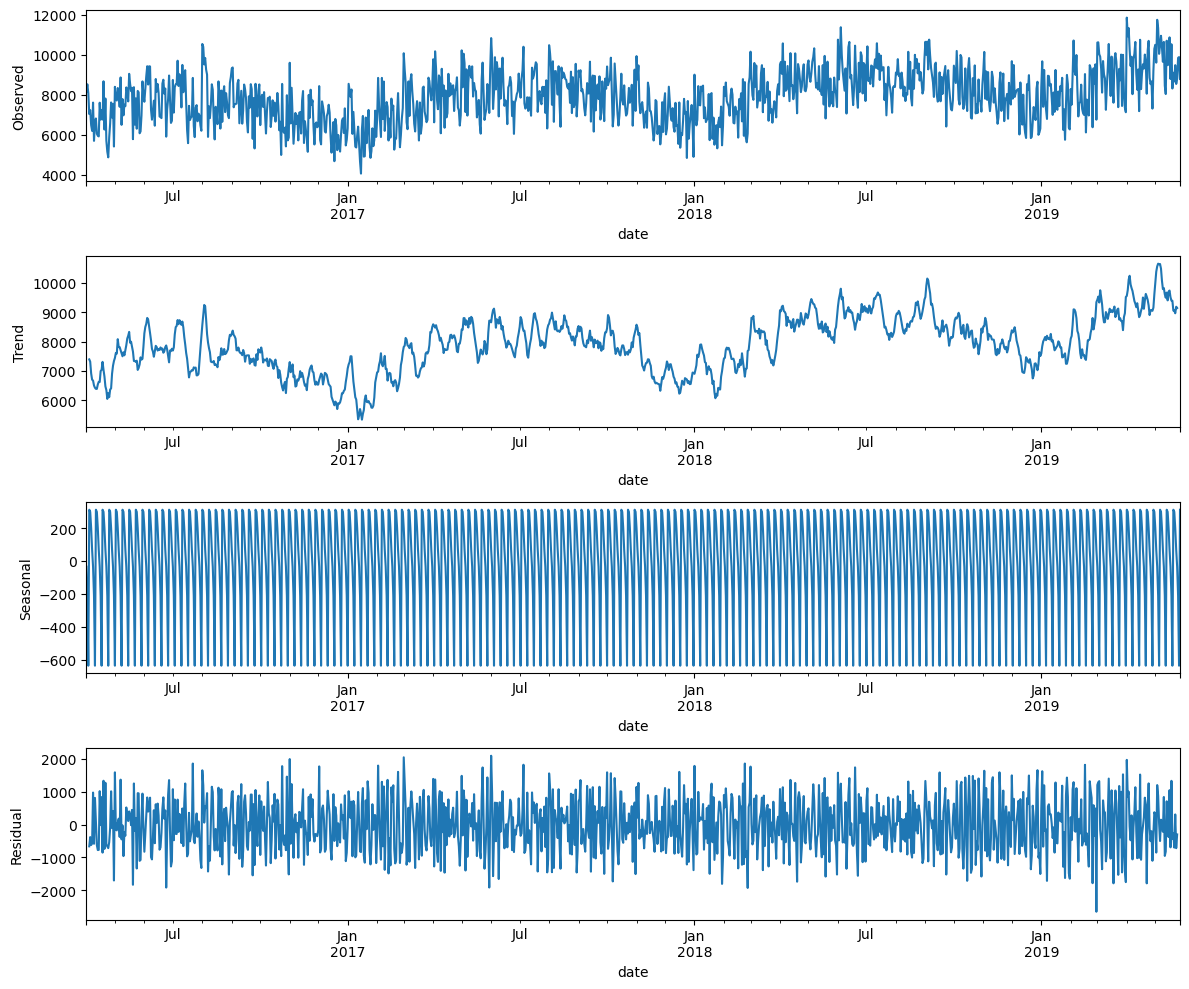

Trend:
 date
2016-04-01            NaN
2016-04-02            NaN
2016-04-03            NaN
2016-04-04    7392.000000
2016-04-05    7314.857143
Name: trend, dtype: float64
Saisonalität:
 date
2016-04-01    -34.035301
2016-04-02   -212.149504
2016-04-03   -637.308136
2016-04-04    312.846232
2016-04-05    299.685953
Name: seasonal, dtype: float64
Rest:
 date
2016-04-01           NaN
2016-04-02           NaN
2016-04-03           NaN
2016-04-04   -660.846232
2016-04-05   -378.543096
Name: resid, dtype: float64


In [299]:
#Decomposition of calls
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Laden der Daten aus der CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data = pd.read_csv(file_path)

# Konvertieren Sie die Datumsspalte in ein Datumsformat und setzen Sie sie als Index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Überprüfen Sie die Daten
print(data.head())

# Zeitreihe dekomponieren
result = seasonal_decompose(data['calls'], model='additive', period=7)

# Komponenten visualisieren
ig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

# Komponenten anzeigen
trend = result.trend
seasonal = result.seasonal
residual = result.resid

print("Trend:\n", trend.head())
print("Saisonalität:\n", seasonal.head())
print("Rest:\n", residual.head())
data['Residuals_calls'] = result.resid

data = data.reset_index()

file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)

In [301]:

print(data.head())

        date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0 2016-04-01           0      73   8154    1700     90         4       0   
1 2016-04-02           1      64   8526    1700     90        70       0   
2 2016-04-03           2      68   8088    1700     90         0       0   
3 2016-04-04           3      71   7044    1700     90         0       0   
4 2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  Residuals_calls  
0            1    0.042941              NaN  
1            1    0.037647          

         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  Residuals_calls  
0            1    0.042941              NaN  
1            1    0.037647    

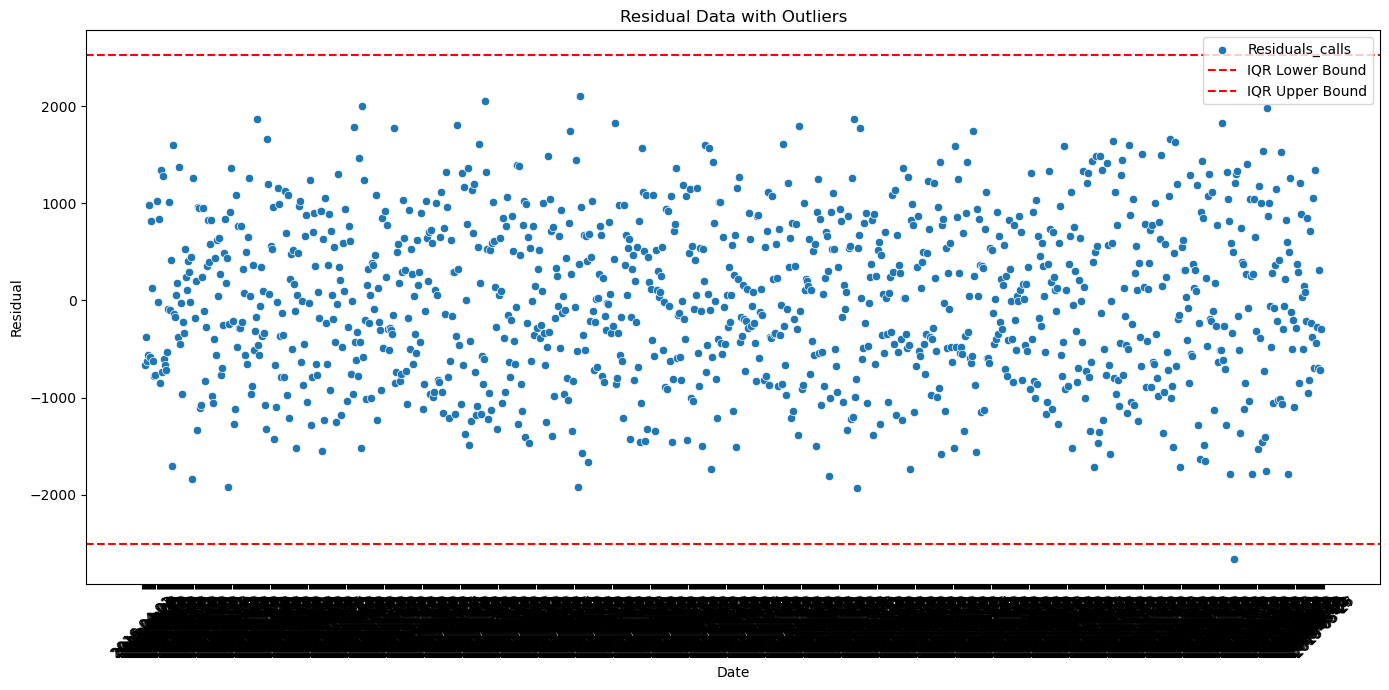

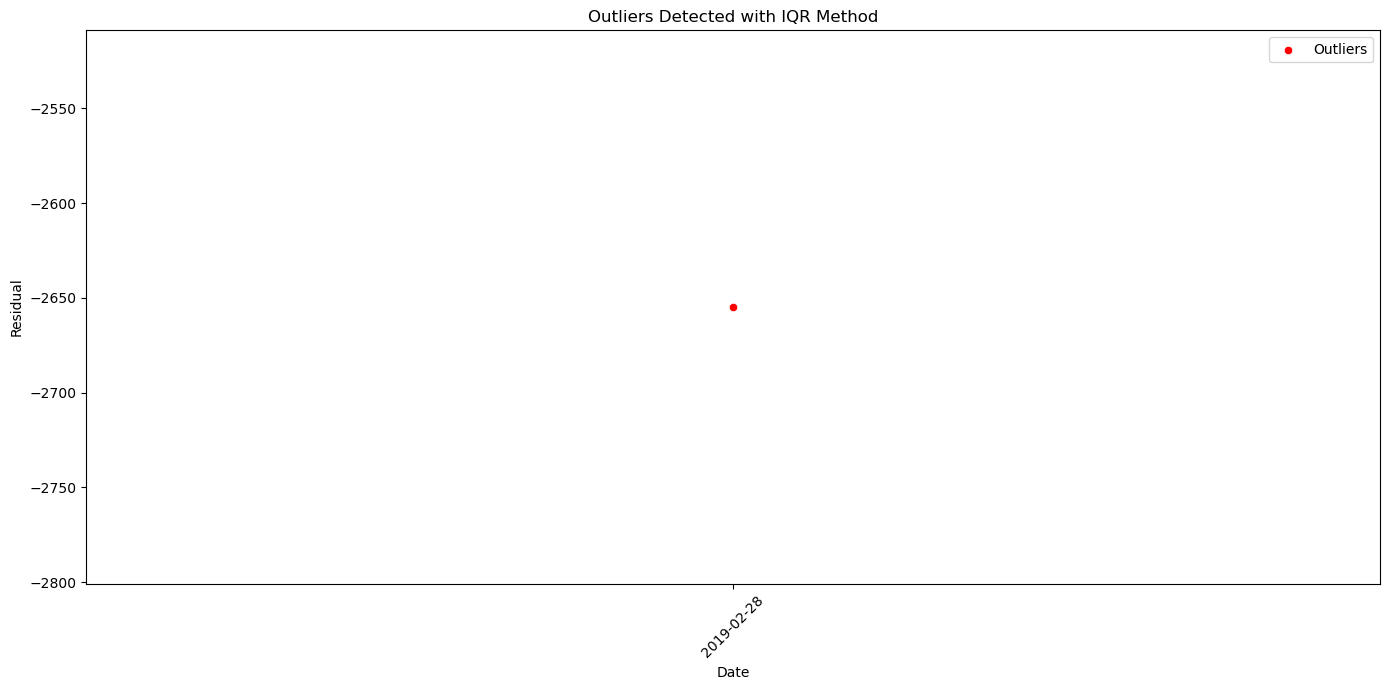

Alle Ausreißer basierend auf IQR:
             date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
1063  2019-02-28        1063      57   6762    1900     90         0       0   

      weekday  year  calendarweek  month  quarter  season  Feiertage  \
1063        3  2019             9      2        1       0          0   

      schulferien  Sick-ratio  Residuals_calls  Ausreißer_Calls  
1063            0        0.03     -2654.774803             True  


In [303]:


# Identifizieren der Ausreißer Calls
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data = pd.read_csv(file_path)
# Überprüfen der Daten
print(data.head())

# Methode 2: IQR (Interquartilsabstand)
# Berechnung des IQR
Q1 = data['Residuals_calls'].quantile(0.25)
Q3 = data['Residuals_calls'].quantile(0.75)
IQR = Q3 - Q1

# Identifizieren der Ausreißer basierend auf IQR
data['Ausreißer_Calls'] = (data['Residuals_calls'] < (Q1 - 1.5 * IQR)) | \
                          (data['Residuals_calls'] > (Q3 + 1.5 * IQR))

# Ausgabe der Daten mit der neuen Spalte
print("Daten mit Ausreißer-Spalte:\n", data.head())

# Filtern der Ausreißer basierend auf der neuen Spalte
outliers_iqr = data[data['Ausreißer_Calls']]

print("Ausreißer basierend auf IQR:\n", outliers_iqr)

# Visualisierung der Residualdaten und der Ausreißer
plt.figure(figsize=(14, 7))

# Plot der Residualdaten
sns.scatterplot(x=data['date'], y=data['Residuals_calls'], label='Residuals_calls')
plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--', label='IQR Lower Bound')
plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--', label='IQR Upper Bound')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Data with Outliers')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Plot der Ausreißer
plt.figure(figsize=(14, 7))
sns.scatterplot(x=outliers_iqr['date'], y=outliers_iqr['Residuals_calls'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Outliers Detected with IQR Method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Alle Ausreißer basierend auf IQR:\n", outliers_iqr)


            Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
date                                                                     
2016-04-01           0      73   8154    1700     90         4       0   
2016-04-02           1      64   8526    1700     90        70       0   
2016-04-03           2      68   8088    1700     90         0       0   
2016-04-04           3      71   7044    1700     90         0       0   
2016-04-05           4      63   7236    1700     90         0       0   

            weekday  year  calendarweek  month  quarter  season  Feiertage  \
date                                                                         
2016-04-01        4  2016            13      4        2       1          0   
2016-04-02        5  2016            13      4        2       1          0   
2016-04-03        6  2016            13      4        2       1          0   
2016-04-04        0  2016            14      4        2       1          0   
2016-04-05   

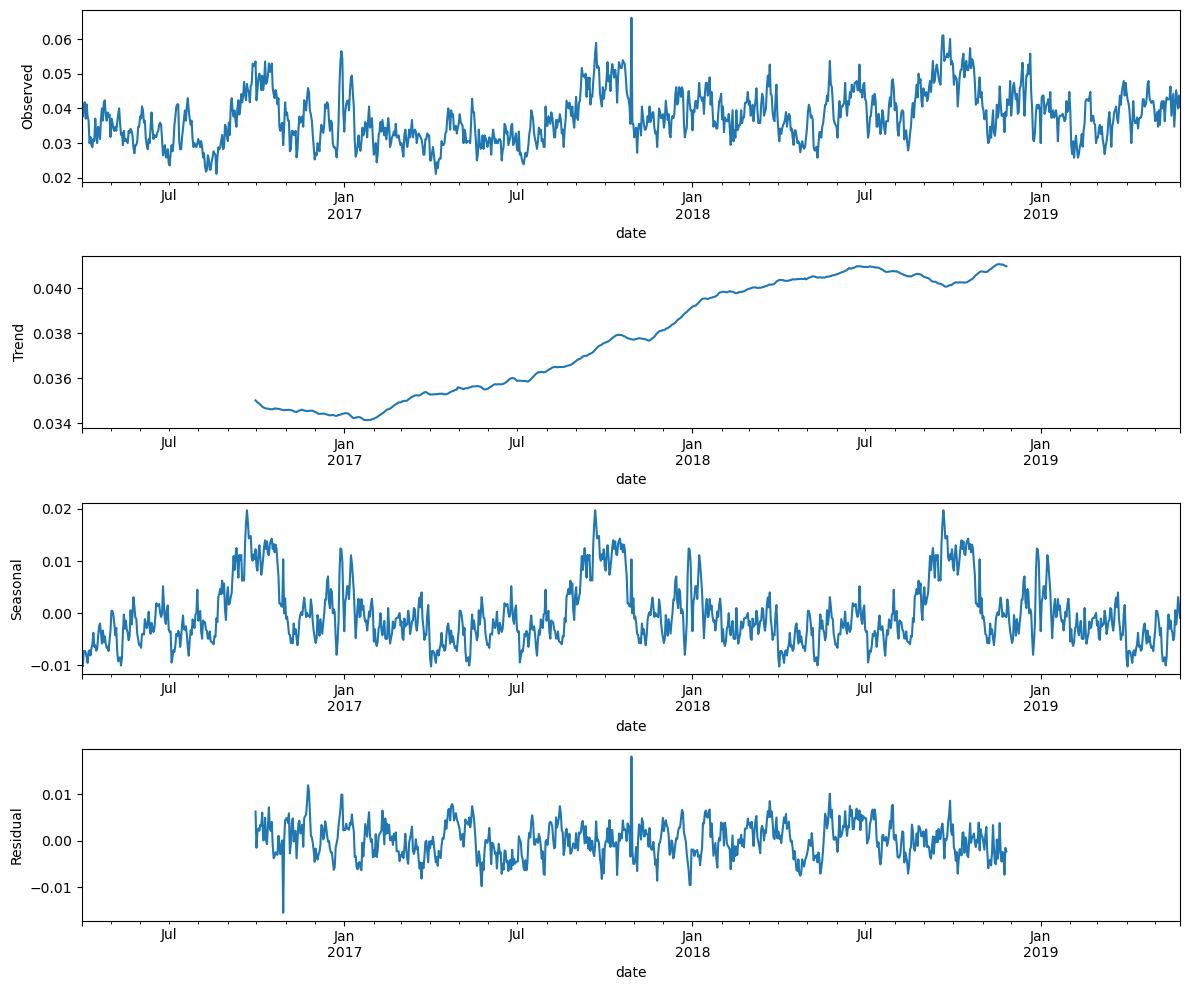

Trend:
 date
2016-04-01   NaN
2016-04-02   NaN
2016-04-03   NaN
2016-04-04   NaN
2016-04-05   NaN
Name: trend, dtype: float64
Saisonalität:
 date
2016-04-01   -0.008626
2016-04-02   -0.010219
2016-04-03   -0.007267
2016-04-04   -0.007225
2016-04-05   -0.007545
Name: seasonal, dtype: float64
Rest:
 date
2016-04-01   NaN
2016-04-02   NaN
2016-04-03   NaN
2016-04-04   NaN
2016-04-05   NaN
Name: resid, dtype: float64


In [262]:
#Decomposition of sick-ratio
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Laden der Daten aus der CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data = pd.read_csv(file_path)

# Konvertieren Sie die Datumsspalte in ein Datumsformat und setzen Sie sie als Index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Überprüfen Sie die Daten
print(data.head())

# Zeitreihe dekomponieren
result = seasonal_decompose(data['Sick-ratio'], model='additive', period=365)

# Komponenten visualisieren
ig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

# Komponenten anzeigen
trend = result.trend
seasonal = result.seasonal
residual = result.resid

print("Trend:\n", trend.head())
print("Saisonalität:\n", seasonal.head())
print("Rest:\n", residual.head())
data['Residuals_Sick-ratio'] = result.resid

data = data.reset_index()

file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)


In [305]:
# Header des DataFrames ausdrucken
print("Spaltennamen im DataFrame:")
print(data.columns)

Spaltennamen im DataFrame:
Index(['date', 'Unnamed: 0', 'n_sick', 'calls', 'n_duty', 'n_sby', 'sby_need',
       'dafted', 'weekday', 'year', 'calendarweek', 'month', 'quarter',
       'season', 'Feiertage', 'schulferien', 'Sick-ratio', 'Residuals_calls',
       'Ausreißer_Calls'],
      dtype='object')


In [311]:
# Ausreißer Erkennung Sick-ratio
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data = pd.read_csv(file_path)
# Überprüfen der Daten
print(data.head())

# Methode 2: IQR (Interquartilsabstand)
# Berechnung des IQR
Q1 = data['Residuals_Sick-ratio'].quantile(0.25)
Q3 = data['Residuals_Sick-ratio'].quantile(0.75)
IQR = Q3 - Q1

# Identifizieren der Ausreißer basierend auf IQR
data['Ausreißer_Sick-ratio'] = (data['Residuals_Sick-ratio'] < (Q1 - 1.5 * IQR)) | \
                               (data['Residuals_Sick-ratio'] > (Q3 + 1.5 * IQR))

# Ausgabe der Daten mit der neuen Spalte
print("Daten mit Ausreißer-Spalte:\n", data.head())

# Filtern der Ausreißer basierend auf der neuen Spalte
outliers_iqr = data[data['Ausreißer_Sick-ratio']]

print("Ausreißer basierend auf IQR:\n", outliers_iqr)

# Visualisierung der Residualdaten und der Ausreißer
plt.figure(figsize=(14, 7))

# Plot der Residualdaten
sns.scatterplot(x=data['date'], y=data['Residuals_Sick-ratio'], label='Residuals_Sick-ratio')
plt.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--', label='IQR Lower Bound')
plt.axhline(y=Q3 + 1.5 * IQR, color='r', linestyle='--', label='IQR Upper Bound')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Data with Outliers')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Plot der Ausreißer
plt.figure(figsize=(14, 7))
sns.scatterplot(x=outliers_iqr['date'], y=outliers_iqr['Residuals_Sick-ratio'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Outliers Detected with IQR Method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Alle Ausreißer basierend auf IQR:\n", outliers_iqr)
file_path ='/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)


         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  Residuals_calls  
0            1    0.042941              NaN  
1            1    0.037647    

KeyError: 'Residuals_Sick-ratio'

In [313]:

file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data = pd.read_csv(file_path)
print(data.head())
# Lag Variable hinzufügen
# Berechne den gleitenden Durchschnitt der letzten 7 Tage
data['rolling_mean_7_calls'] = data['calls'].rolling(window=7).mean()
data['rolling_mean_7_Sick-ratio'] = data['Sick-ratio'].rolling(window=7).mean()
data['lag_49_calls'] = data['calls'].shift(49)  # # 7 weeks lag
data['lag_365_calls'] = data['calls'].shift(365)  # 1 year lag
data['lag_49_Sickratio'] = data['Sick-ratio'].shift(49)  # 7 weeks lag
data['lag_365_Sickratio'] = data['Sick-ratio'].shift(365)  # 1 year lag
data['average7days45lag_calls'] = data['rolling_mean_7_calls'].shift(45)
data['average7days45lag_Sickratio'] = data['rolling_mean_7_Sick-ratio'].shift(45)
data.fillna(method='bfill', inplace=True)  # Backward fill

file_path ='/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)

         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  calendarweek  month  quarter  season  Feiertage  \
0        4  2016            13      4        2       1          0   
1        5  2016            13      4        2       1          0   
2        6  2016            13      4        2       1          0   
3        0  2016            14      4        2       1          0   
4        1  2016            14      4        2       1          0   

   schulferien  Sick-ratio  Residuals_calls  
0            1    0.042941              NaN  
1            1    0.037647    

In [315]:

print(data.head())

         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  ...  Sick-ratio  Residuals_calls  rolling_mean_7_calls  \
0        4  2016  ...    0.042941      -660.846232                7392.0   
1        5  2016  ...    0.037647      -660.846232                7392.0   
2        6  2016  ...    0.040000      -660.846232                7392.0   
3        0  2016  ...    0.041765      -660.846232                7392.0   
4        1  2016  ...    0.037059      -378.543096                7392.0   

   rolling_mean_7_Sick-ratio  lag_49_calls  lag_365_calls  lag_49_Sickratio  \
0

In [319]:
data['Fahrer_benötigt']=data['calls']/5
print(data.head())

         date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0  2016-04-01           0      73   8154    1700     90         4       0   
1  2016-04-02           1      64   8526    1700     90        70       0   
2  2016-04-03           2      68   8088    1700     90         0       0   
3  2016-04-04           3      71   7044    1700     90         0       0   
4  2016-04-05           4      63   7236    1700     90         0       0   

   weekday  year  ...  Residuals_calls  rolling_mean_7_calls  \
0        4  2016  ...      -660.846232                7392.0   
1        5  2016  ...      -660.846232                7392.0   
2        6  2016  ...      -660.846232                7392.0   
3        0  2016  ...      -660.846232                7392.0   
4        1  2016  ...      -378.543096                7392.0   

   rolling_mean_7_Sick-ratio  lag_49_calls  lag_365_calls  lag_49_Sickratio  \
0                   0.039748        8154.0         8154.0          0.0429

In [321]:
file_path ='/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/processed_data.csv'
data.to_csv(file_path, index=False)